2024-12-01 18:19:00.173036: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10


/Users/supremestudier/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4669 - loss: 1.5782
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6282 - loss: 1.2976
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5096 - loss: 0.8269
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6452 - loss: 0.6643
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6865 - loss: 0.5591
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6865 - loss: 0.5567
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7861 - loss: 0.5177
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6809 - loss: 0.5970
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.7618 - loss: 0.4992
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7149 - loss: 0.5423
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Indexes where the model failed to predict: [ 0  1  3  4  6  7  8 11 12 14 16 22 25 29 32 34 37 39]


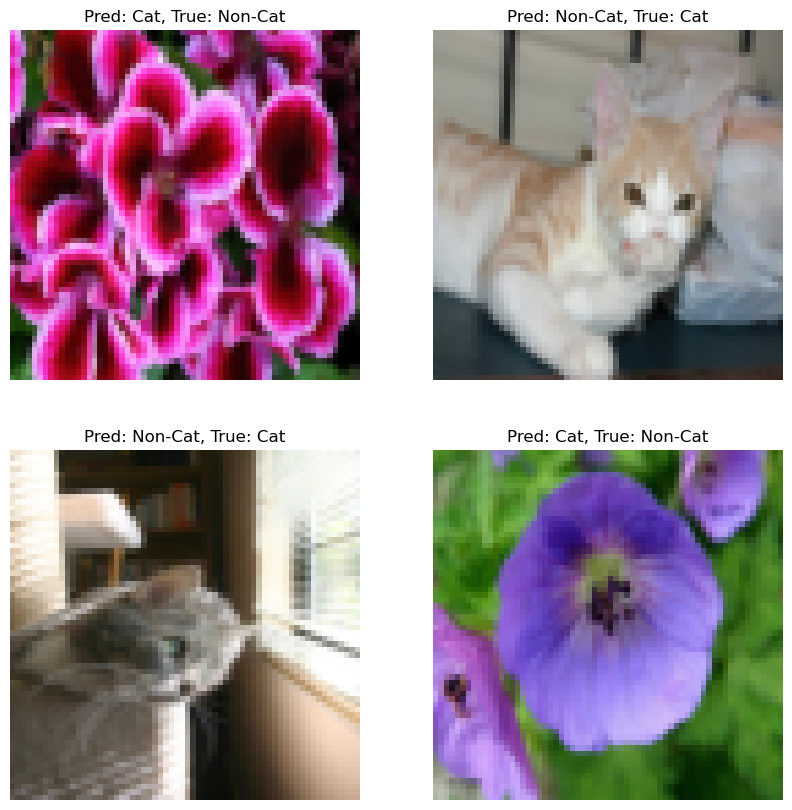

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# 1. Load the data
def load_data(train_path):
    # Load data from the same file
    with h5py.File(train_path, 'r') as f:
        X_full = np.array(f['train_set_x'][:])  # All images
        Y_full = np.array(f['train_set_y'][:])  # All labels

    # Split the data into training and testing
    X_train = X_full[:163]  # First 163 samples for training
    Y_train = Y_full[:163]  # Labels for the first 163 samples

    X_test = X_full[163:]  # Remaining 46 samples for testing
    Y_test = Y_full[163:]  # Labels for the remaining 46 samples

    return X_train, Y_train, X_test, Y_test

# 2. Preprocess the data (normalize, flatten, etc.)
def preprocess_data(X_train, Y_train, X_test, Y_test):
    # Normalize images to [0, 1] range
    X_train = X_train / 255.0
    X_test = X_test / 255.0

    # Flatten the images (if you're using a fully connected network)
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    # One-hot encode labels
    Y_train_onehot = to_categorical(Y_train, num_classes=2)
    Y_test_onehot = to_categorical(Y_test, num_classes=2)

    return X_train_flat, Y_train_onehot, X_test_flat, Y_test_onehot

# 3. Build the model (a simple fully connected neural network)
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='softmax'))  # Binary classification (cat vs non-cat)
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 4. Train the model
def train_model(model, X_train, Y_train):
    model.fit(X_train, Y_train, epochs=10, batch_size=64, verbose=1)

# 5. Evaluate the model and get the failed predictions
def evaluate_model(model, X_test, Y_test):
    predictions = model.predict(X_test)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(Y_test, axis=1)

    # Get the indexes of the wrong predictions
    wrong_predictions_idx = np.where(predicted_classes != true_classes)[0]

    return wrong_predictions_idx, predicted_classes, true_classes, predictions

# 6. Plot the images where the model failed
def plot_failed_images(X_test, wrong_predictions_idx, predicted_classes, true_classes, n=4):
    plt.figure(figsize=(10, 10))
    
    for i in range(min(n, len(wrong_predictions_idx))):
        idx = wrong_predictions_idx[i]
        plt.subplot(2, 2, i + 1)
        plt.imshow(X_test[idx])
        plt.title(f"Pred: {'Cat' if predicted_classes[idx] == 1 else 'Non-Cat'}, True: {'Cat' if true_classes[idx] == 1 else 'Non-Cat'}")
        plt.axis('off')

    plt.show()

# Main function to run everything
def main():
    # Load data from train_catvnoncat.h5
    X_train, Y_train, X_test, Y_test = load_data('train_catvnoncat.h5')

    # Preprocess data
    X_train_flat, Y_train_onehot, X_test_flat, Y_test_onehot = preprocess_data(X_train, Y_train, X_test, Y_test)

    # Build model
    model = build_model(X_train_flat.shape[1])

    # Train model
    train_model(model, X_train_flat, Y_train_onehot)

    # Evaluate model and get failed predictions
    wrong_predictions_idx, predicted_classes, true_classes, predictions = evaluate_model(model, X_test_flat, Y_test_onehot)

    # Output: List of indexes where the model failed
    print("Indexes where the model failed to predict:", wrong_predictions_idx)

    # Output: Plot 4 images where the model failed
    plot_failed_images(X_test, wrong_predictions_idx, predicted_classes, true_classes, n=4)

if __name__ == "__main__":
    main()
